In [31]:
#download
import pandas as pd
url = 'https://fbref.com/en/squads/8cec06e1/Wolverhampton-Wanderers-Stats'
df = pd.read_html(url, attrs={"id": "stats_standard_9"})[0]
df.to_excel("wolves_standard_stats.xlsx")

In [46]:
#reload
df = pd.read_excel("wolves_standard_stats.xlsx")
df.head();
print(df.columns.tolist())


['Unnamed: 0', 'Player', 'Nation', 'S', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls.1', 'Ast.1', 'G+A.1', 'G-PK.1', 'G+A-PK', 'xG.1', 'xAG.1', 'xG+xAG', 'npxG.1', 'npxG+xAG.1', 'PrgC90', 'PrgP90', 'PrgR90']


In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

plt.style.use('dark_background')
df = pd.read_excel("wolves_standard_stats.xlsx")
if isinstance(df.columns, pd.MultiIndex):
    df.columns = ['_'.join([str(x) for x in tup]).strip() for tup in df.columns]
player_cols = [c for c in df.columns if 'player' in c.lower()]
player_col = player_cols[0] if player_cols else 'Player'
df = df[~df[player_col].isin(['Squad Total', 'Opponent Total'])]
if 'Min' in df.columns:
    df['Min'] = pd.to_numeric(df['Min'], errors='coerce')
    df = df[df['Min'] >= 500]
else:
    raise ValueError("Missing 'Min' column for minutes played.")
if 'S' in df.columns:
    df['PrimaryRole'] = df['S'].str.split(',').str[0].str.upper().str.strip()
else:
    raise ValueError("Missing 'S' column for position info.")
position_colors = {
    'GK': 'limegreen',
    'DF': 'deepskyblue',
    'MF': 'orange',
    'FW': 'red'
}

def scatter_plot(df, x_col, y_col, label_col, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    texts = []
    for pos, color in position_colors.items():
        sub_df = df[df['PrimaryRole'] == pos]
        ax.scatter(sub_df[x_col], sub_df[y_col], label=pos, color=color, alpha=0.8, s=40)

        for _, row in sub_df.iterrows():
            texts.append(ax.text(row[x_col], row[y_col], str(row[label_col]), fontsize=8, color='white'))
    adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle='-', color='lightgray', lw=0.5))
    ax.set_facecolor('#121212')  # even darker background inside the plot
    ax.set_xlabel(x_col, color='white')
    ax.set_ylabel(y_col, color='white')
    ax.set_title(title, color='white')
    ax.legend(title='Primary Position', loc='upper left', facecolor='#1e1e1e', edgecolor='white', labelcolor='white')
    ax.grid(True, linestyle='--', color='gray', alpha=0.4)
    plt.tight_layout()
    plt.show()

cols_needed = ['PrgC', 'PrgP', 'PrgR', 'Min', 'S']
for col in cols_needed:
    if col not in df.columns:
        raise ValueError(f"Missing column: {col}")

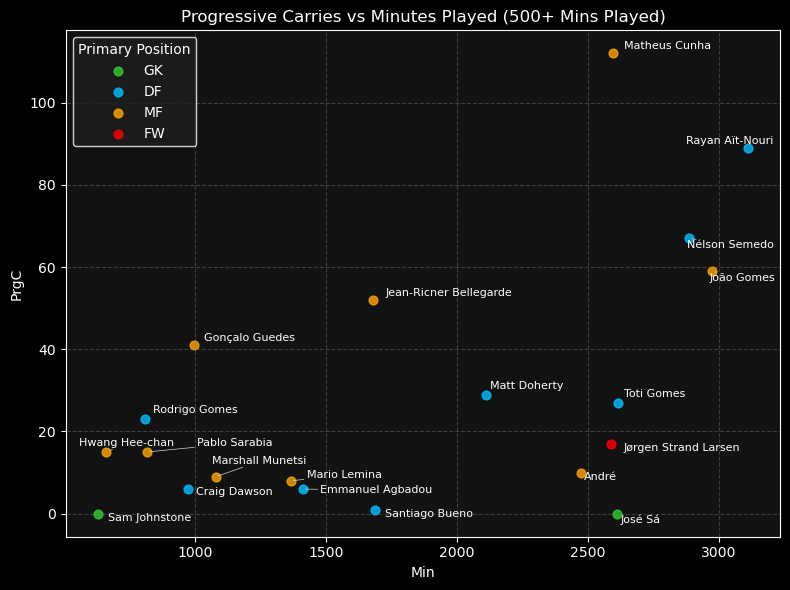

In [118]:
scatter_plot(df, 'Min', 'PrgC', player_col, 'Progressive Carries vs Minutes Played (500+ Mins Played)')

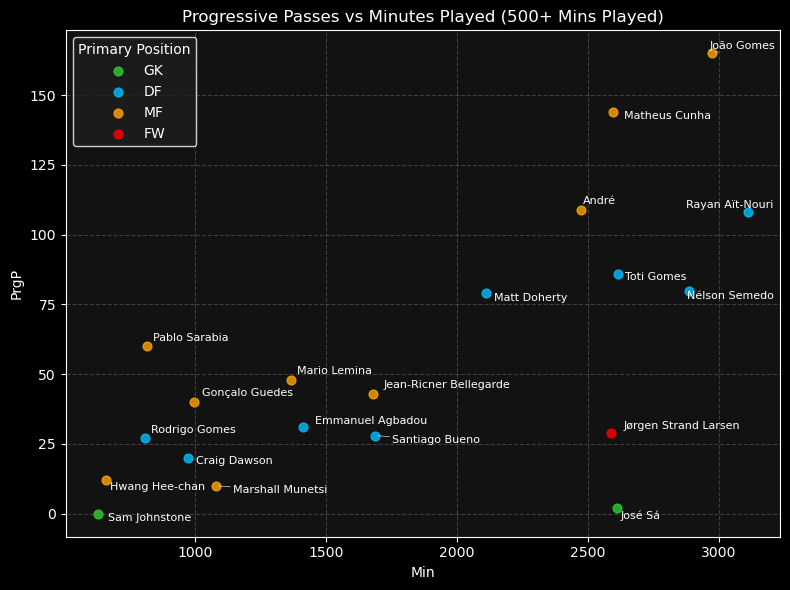

In [119]:
scatter_plot(df, 'Min', 'PrgP', player_col, 'Progressive Passes vs Minutes Played (500+ Mins Played)')

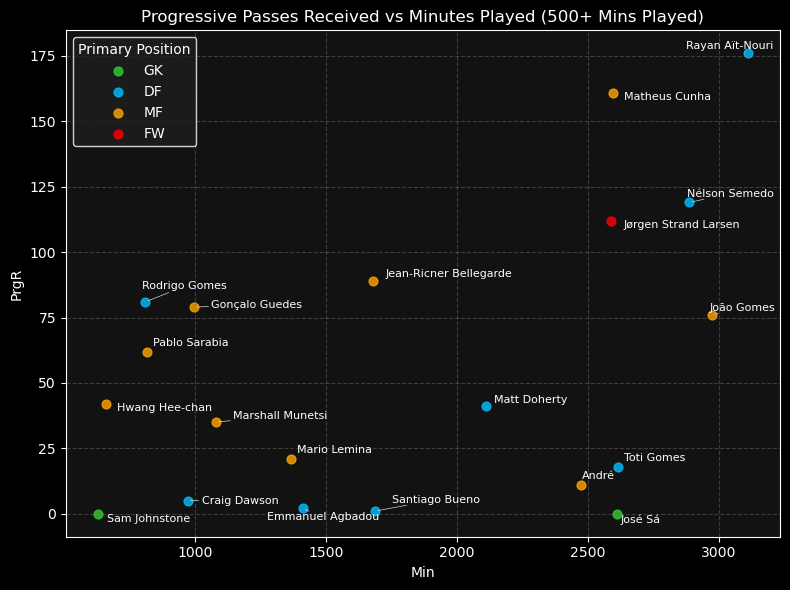

In [120]:
scatter_plot(df, 'Min', 'PrgR', player_col, 'Progressive Passes Received vs Minutes Played (500+ Mins Played)')

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

df = pd.read_excel("wolves_standard_stats.xlsx")

if isinstance(df.columns, pd.MultiIndex):
    df.columns = ['_'.join([str(x) for x in tup]).strip() for tup in df.columns]

player_cols = [c for c in df.columns if 'player' in c.lower()]
player_col = player_cols[0] if player_cols else 'Player'
df = df[~df[player_col].isin(['Squad Total', 'Opponent Total'])]
if 'Min' in df.columns:
    df['Min'] = pd.to_numeric(df['Min'], errors='coerce')
    df = df[df['Min'] >= 500]
else:
    raise ValueError("Missing 'Min' column for minutes played.")
if 'S' in df.columns:
    df['PrimaryRole'] = df['S'].str.split(',').str[0].str.upper().str.strip()
else:
    raise ValueError("Missing 'S' column for position info.")
position_colors = {
    'GK': 'green',
    'DF': 'lightblue',
    'MF': 'orange',
    'FW': 'red'
}

def scatter_plot(df, x_col, y_col, label_col, title):
    plt.figure(figsize=(8, 6))
    texts = []
    for pos, color in position_colors.items():
        sub_df = df[df['PrimaryRole'] == pos]
        plt.scatter(sub_df[x_col], sub_df[y_col], label=pos, color=color, alpha=0.8, s=40)
        for _, row in sub_df.iterrows():
            texts.append(plt.text(row[x_col], row[y_col], str(row[label_col]), fontsize=8))
    rotation_df = df[(df['Min'] >= 500) & (df['Min'] < 1000)]
    plt.scatter(rotation_df[x_col], rotation_df[y_col],
                facecolors=rotation_df['PrimaryRole'].map(position_colors),
                edgecolors='white', linewidths=1.5, s=60, alpha=1, label='_nolegend_')
    from matplotlib.patches import Patch
    rotational_patch = Patch(facecolor='gray', edgecolor='white', linewidth=1.5,
                              label='Rotational')

    plt.legend(title='Primary Position', loc='upper left', handles=[
        Patch(color='green', label='GK'),
        Patch(color='lightblue', label='DF'),
        Patch(color='orange', label='MF'),
        Patch(color='red', label='FW'),
        rotational_patch
    ])

    adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    plt.grid(True, linestyle='--', color='gray', linewidth=0.5, alpha=0.4)
    plt.tight_layout()
    plt.show()

cols_needed = ['PrgC90', 'PrgP90', 'PrgR90', 'Min', 'S']
for col in cols_needed:
    if col not in df.columns:
        raise ValueError(f"Missing column: {col}")

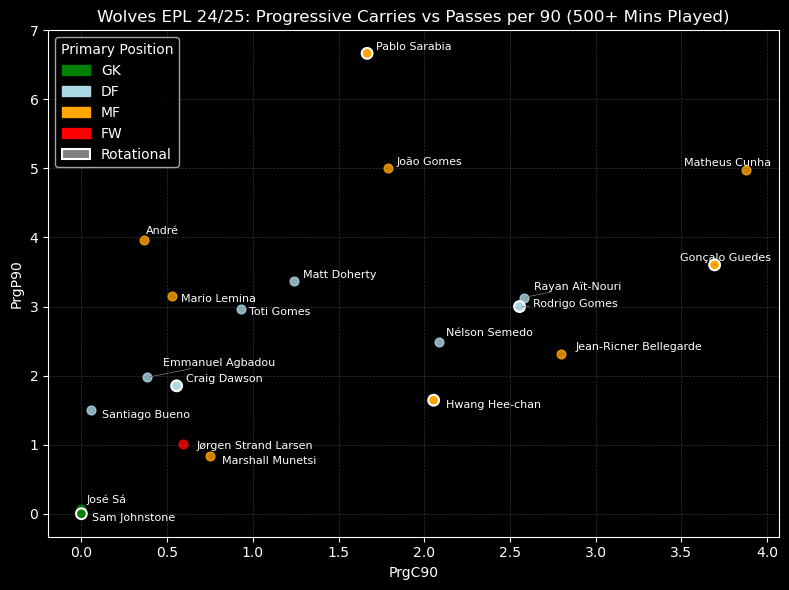

In [114]:
scatter_plot(df, 'PrgC90', 'PrgP90', player_col, 'Wolves EPL 24/25: Progressive Carries vs Passes per 90 (500+ Mins Played)')

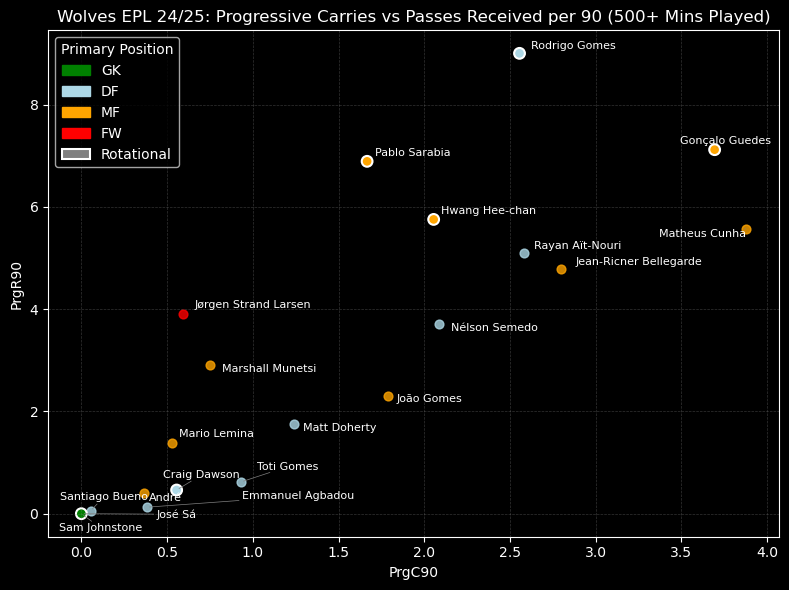

In [115]:
scatter_plot(df, 'PrgC90', 'PrgR90', player_col, 'Wolves EPL 24/25: Progressive Carries vs Passes Received per 90 (500+ Mins Played)')

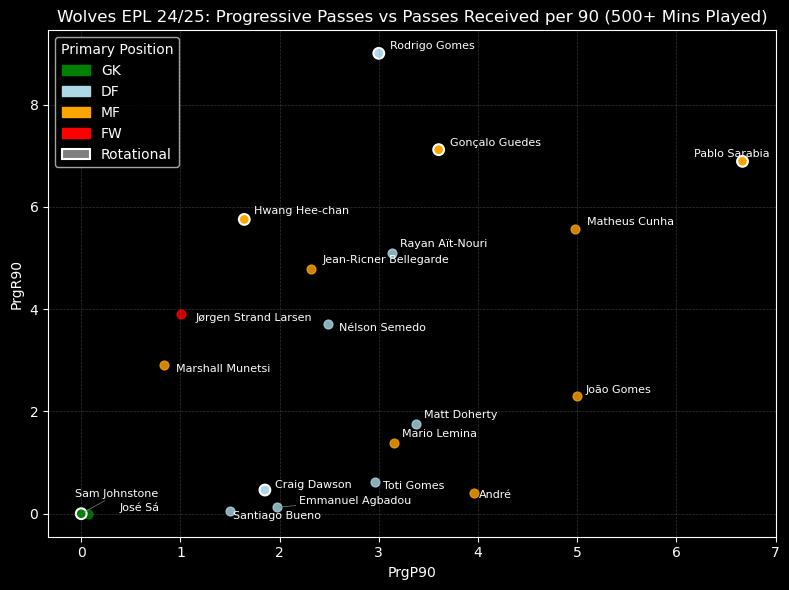

In [116]:
scatter_plot(df, 'PrgP90', 'PrgR90', player_col, 'Wolves EPL 24/25: Progressive Passes vs Passes Received per 90 (500+ Mins Played)')